In [2]:
from dataset_utils import cartoonset
from dataset_utils import celeba
from dataset_utils import mnist
from dataset_utils import mnist_m
from dataset_utils import svhn
from dataset_utils import visda
from dataset_utils import pacs

from dataset_utils.tfrecords_utils import get_tf_dataset

import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
if not os.path.exists('TFRecords'):
    os.mkdir('TFRecords')

# Table of Contents 

---

In alphabetical order,

  * [CartoonSet](#cartoonset)
  * [CelebA](#celeba)
  * [MNIST dataset](#mnist)
  * [MNIST-M dataset](#mnist-m)
  * [SVHN dataset](#svhn)
  * [VisDA (Visual Domain Adaptation challenge)](#visda)

## General API

--- 

The module for a dataset `data` is contained in `dataset_utils.data.py`. It contains a converter, `DataConverter` and a loader `DataLoader`.


#### Converter
The converter contains one method, `convert` that generates the TFRecords in the given `target_path`. Additionally, this method takes as keyword argument `sort`; If this is True, the entries in the TFRecords will be sorted by class labels when possible (e.g. classification task). Note that this means the `shuffle_buffer` size should be at least equal to the number of samples in the dataset for proper shuffling (hence not optimal for large datasets), but it can be convenient to quickly filter/sample the dataset based on classes.


#### Loader
The loader simply builds a proper parsing function to extract data from the TFRecords and format it correctly. Such a function can then be passed to the `tf.data.Dataset` API map function.

### MNIST
---
<a id='mnist'></a>

Original Download [[link]](http://yann.lecun.com/exdb/mnist/)

`source_path` is a directory containing `.ubyte` files as downloaded on the original website

`target_path` is the base path to save TFRecords to

TFRecords will contain:

  * `image`: (28, 28, 1) uint8-array (parsed to a float array in [0, 1] by the `MNISTLoader`)
  * `class`: scalar in 0-9
  * `id`: The image index in the original dataset

In [45]:
source_path = os.path.expanduser('~/Data/MNIST/')
target_path = 'TFRecords/tf_mnist'

In [5]:
%%time
# convert MNIST dataset to TFRecords
converter = mnist.MNISTConverter(source_path)
converter.convert(target_path)

Loading original MNIST data from /home/aroyer/Data/MNIST/
Load train: 60000 / 60000
Wrote train in file TFRecords/tf_mnist_train

Load test: 10000 / 10000
Wrote test in file TFRecords/tf_mnist_test

CPU times: user 9.82 s, sys: 713 ms, total: 10.5 s
Wall time: 10.5 s


Creating dataset with batch_size 8 and shuffle buffer 1
Outputs:
   class: Tensor("class_label:0", shape=(), dtype=int32)
   id: Tensor("index:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(128, 128, 1), dtype=float32)


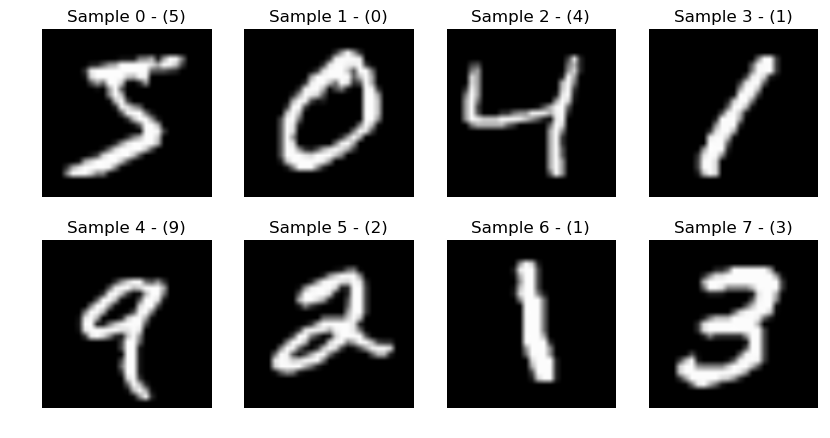

In [57]:
# load training dataset and resize image to 128
loader = mnist.MNISTLoader(resize=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(np.tile(data_['image'][i], (1, 1, 3)))
    ax.set_axis_off()
plt.show()

### SVHN
---
<a id='svhn'></a>

Original Download [[link]](http://ufldl.stanford.edu/housenumbers/)

**Format 2** (32x32 images saved in a mat file)

`source_path` is a directory containing `.mat` files as downloaded on the original website

`target_path` is the base path to save TFRecords to

TFRecords will contain:

  * `image`: (32, 32, 3) uint8-array (parsed to a float array in [0, 1] by the `SVHNLoader`)
  * `class`: scalar in 0-9
  * `id`: The image index in the original dataset

In [62]:
source_path = os.path.expanduser('~/Data/SVHN/')
target_path = 'TFRecords/tf_svhn'

In [8]:
%%time
# convert SVHN dataset to TFRecords
converter = svhn.SVHNConverter(source_path)
converter.convert(target_path)

Loading original SVHN data from /home/aroyer/Data/SVHN/
Load train: 73257 / 73257
Wrote train in file TFRecords/tf_svhn_train

Load test: 26032 / 26032
Wrote test in file TFRecords/tf_svhn_test

CPU times: user 12.1 s, sys: 607 ms, total: 12.7 s
Wall time: 17.1 s


Creating dataset with batch_size 8 and shuffle buffer 1
Outputs:
   class: Tensor("class_label:0", shape=(), dtype=int32)
   id: Tensor("index:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(64, 64, 3), dtype=float32)


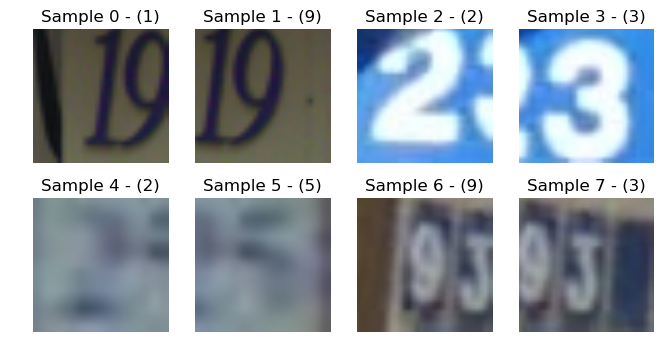

In [64]:
# load training dataset
loader = svhn.SVHNLoader(resize=64, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(8, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()

## MNIST-M

---
<a id='mnist-m'></a>

Original Download [[link]](http://yaroslav.ganin.net/) (**unpacked version**)


`source_path` is a directory containing the `mnist_m_test` and `mnist_m_train` image folders, as well as labels text files, as downloaded on the original website

`target_path` is the base path to save TFRecords to

TFRecords will contain:

  * `image`: (32, 32, 3) uint8-array (parsed to a float array in [0, 1] by the `MNISTMLoader`)
  * `class`: scalar in 0-9
  * `id`: The image index in the original dataset

In [59]:
source_path = os.path.expanduser('~/Data/mnist_m/')
target_path = 'TFRecords/tf_mnist-m'

In [11]:
%%time
# convert MNIST-M dataset to TFRecords
converter = mnist_m.MNISTMConverter(source_path)
converter.convert(target_path)

Loading original MNIST-M data from /home/aroyer/Data/mnist_m/
Load train: 59001 / 59001
Wrote train in file TFRecords/tf_mnist-m_train

Load test: 9001 / 9001
Wrote test in file TFRecords/tf_mnist-m_test

CPU times: user 19.9 s, sys: 1.21 s, total: 21.1 s
Wall time: 21.3 s


Creating dataset with batch_size 8 and shuffle buffer 1
Outputs:
   class: Tensor("class_label:0", shape=(), dtype=int32)
   id: Tensor("index:0", shape=(), dtype=int32)
   image: Tensor("image:0", shape=(64, 64, 3), dtype=float32)


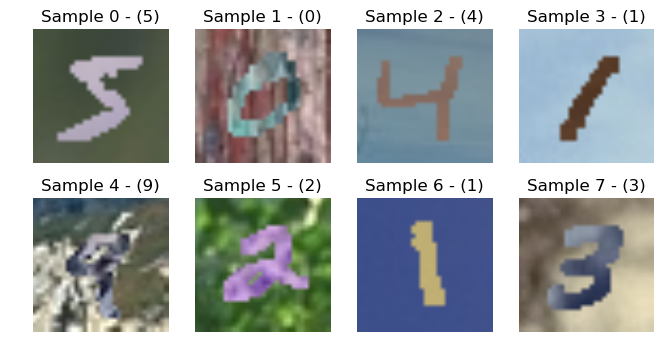

In [61]:
# load training dataset
loader =  mnist_m.MNISTMLoader(resize=64, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(8, 4))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Sample %d - (%d)' % (data_['id'][i], data_['class'][i]))
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()

## CartoonSet

---
<a id='cartoonset'></a>

Original Download [[link]](https://google.github.io/cartoonset/) (**10k** or **100k** version)

`source_path` is the directory corresponding to the extracted archive, as downloaded on the original website

`target_path` is the base path to save TFRecords to

TFRecords will contain:

  * `image`: Either a (500, 500, 3) uint8-array or a string containing the relative filename of the image; depending of the value of the *save_image_in_records* argument.
  * `bounding_box`: Four coordinates of the bounding box englobing the cartoon avatar [ymin, xmin, ymax, xmax].
  * `chin_length`: The chin length attribute (3 possible values)
  * `eye_angle`: The eye angle attribute (3 possible values)
  * `eye_color`: The eye color attribute (5 possible values)
  * `eye_eyebrow_distance`: The distance between eye and eyebrow attribute (3 possible values)
  * `eye_lashes`: The eye lashes attribute (2 possible values)
  * `eye_lid`: The eye lid attribute (2 possible values)
  * `eye_slant`: The eye slant attribute (3 possible values)
  * `eyebrow_shape`: The eyebrow shape attribute (14 possible values)
  * `eyebrow_thickness`: The eyebrow thickness attribute (4 possible values)
  * `eyebrow_weight`: The eyebrow weight attribute (2 possible values)
  * `eyebrow_width`: The eyebrow width attribute (3 possible values)
  * `face_color`: The face color attribute (11 possible values)
  * `face_shape`: The face shape attribute (7 possible values)
  * `facial_hair`: The facial hair attribute (15 possible values)
  * `glasses`: The glasses attribute (12 possible values)
  * `glasses_color`: The eye angle attribute (7 possible values)
  * `hair`: The hair attribute (111 possible values)
  * `hair_color`: The hair color attribute (10 possible values)
  * `eye_angle`: The eye angle attribute (3 possible values)
  * `eye_angle`: The eye angle attribute (3 possible values)

In [71]:
source_path = os.path.expanduser('~/Data/cartoonset100k/')
target_path = 'TFRecords/tf_cartoonset'
save_image_in_records = False # whether to save image directly in TFrecords or only a path to it

In [26]:
%%time
# convert Cartoonset dataset to TFRecords
converter = cartoonset.CartoonSetConverter(source_path)
converter.convert(target_path, 
                  train_split=[0, 1, 2, 3, 4, 5, 6],
                  val_split=[7],
                  test_split=[8, 9], 
                  save_image_in_records=save_image_in_records)

Found 10 data folders:
  /home/aroyer/Data/cartoonset100k/0
  /home/aroyer/Data/cartoonset100k/1
  /home/aroyer/Data/cartoonset100k/2
  /home/aroyer/Data/cartoonset100k/3
  /home/aroyer/Data/cartoonset100k/4
  /home/aroyer/Data/cartoonset100k/5
  /home/aroyer/Data/cartoonset100k/6
  /home/aroyer/Data/cartoonset100k/7
  /home/aroyer/Data/cartoonset100k/8
  /home/aroyer/Data/cartoonset100k/9

Load train
  folder 7/7: image 10000/10000
Wrote train in file TFRecords/tf_cartoonset_train


Load val
  folder 1/1: image 10000/10000
Wrote val in file TFRecords/tf_cartoonset_val


Load test
  folder 2/2: image 10000/10000
Wrote test in file TFRecords/tf_cartoonset_test

CPU times: user 24min 16s, sys: 17.7 s, total: 24min 34s
Wall time: 25min 11s


Creating dataset with batch_size 8 and shuffle buffer 1
Outputs:
   chin_length: Tensor("ParseSingleExample/Squeeze_chin_length:0", shape=(), dtype=int64)
   eye_angle: Tensor("ParseSingleExample/Squeeze_eye_angle:0", shape=(), dtype=int64)
   eye_color: Tensor("ParseSingleExample/Squeeze_eye_color:0", shape=(), dtype=int64)
   eye_eyebrow_distance: Tensor("ParseSingleExample/Squeeze_eye_eyebrow_distance:0", shape=(), dtype=int64)
   eye_lashes: Tensor("ParseSingleExample/Squeeze_eye_lashes:0", shape=(), dtype=int64)
   eye_lid: Tensor("ParseSingleExample/Squeeze_eye_lid:0", shape=(), dtype=int64)
   eye_slant: Tensor("ParseSingleExample/Squeeze_eye_slant:0", shape=(), dtype=int64)
   eyebrow_shape: Tensor("ParseSingleExample/Squeeze_eyebrow_shape:0", shape=(), dtype=int64)
   eyebrow_thickness: Tensor("ParseSingleExample/Squeeze_eyebrow_thickness:0", shape=(), dtype=int64)
   eyebrow_weight: Tensor("ParseSingleExample/Squeeze_eyebrow_weight:0", shape=(), dtype=int64)
   eyebrow_width:

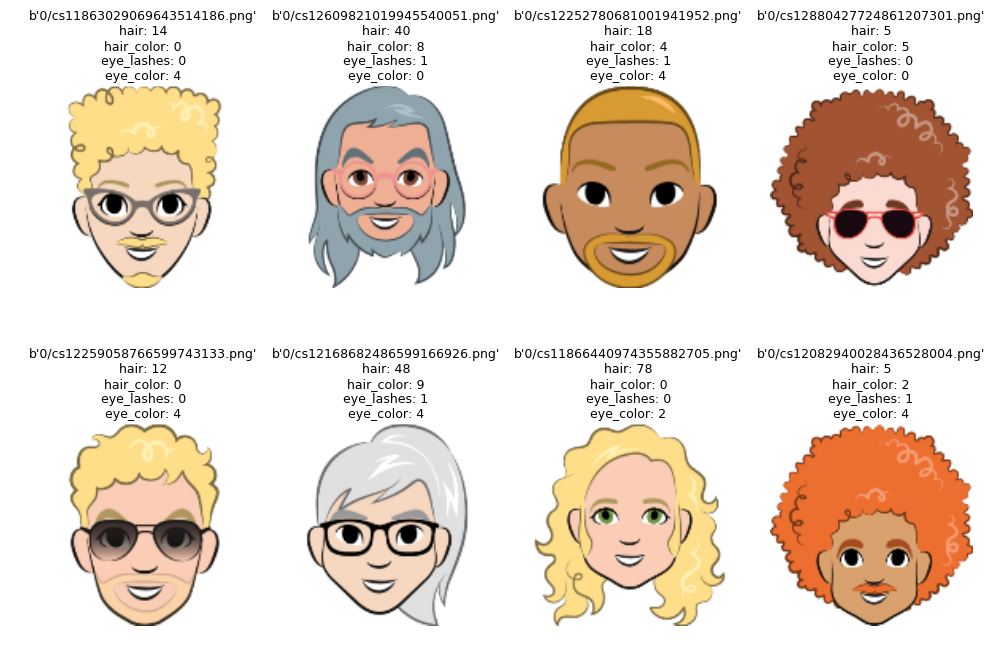

In [74]:
# load training dataset
loader =  cartoonset.CartoonSetLoader(resize=128,
                                      crop_images=True, 
                                      keep_crop_aspect_ratio=True,
                                      one_hot_attributes=False,
                                      save_image_in_records=save_image_in_records,
                                      data_dir=source_path,
                                      verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn)
    if 'bounding_box' in data:
        data['image'] = tf.image.draw_bounding_boxes(data['image'], tf.expand_dims(data['bounding_box'], axis=1))
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(12, 8))
for i, ax in enumerate(axis.flatten()):
    title = ('%s\n' % data_['image_path'][i]) if 'image_path' in data_ else ''
    ax.set_title(title + '\n'.join('%s: %d' % (key, data_[key][i]) 
                                   for key in ['hair', 'hair_color', 'eye_lashes', 'eye_color']), fontsize=9)
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()

## CelebA

---
<a id='celeba'></a>

Original Download [[link]](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)

`source_path` is a directory containing `list_eval_partition.txt`, the train/va/test partition of Celeba, `Anno` a directory containing the CelebA annotation and `Img` a directory regrouping folders of different Celeba versions (e.g., `img_align_celeba`). See original website for download.

`target_path` is the base path to save TFRecords to

TFRecords will contain:

  * `image`: Either a (?, ?, 3) uint8-array or a string containing the relative filename of the image;  depending of the value of the *save_image_in_records* argument.
  * `bounding_box`: Four coordinates of the face bounding box, [xmin, ymin, xmax, ymax]. Normalized by the size of the image to fall in [0, 1].
  * `landmarks`: (5, 2) float array containing the landmarks coordinates [x, y]. Normalized by the image size to fall in [0, 1].
  * `attributes`: A (40,) float array containing the binary value for each attribute (1 if present, -1 if absent)

In [27]:
source_path = os.path.expanduser('~/Data/Celeba/')
target_path = 'TFRecords/tf_celeba'
save_image_in_records = False   # whether to save image directly in TFrecords or only a path to it
cropped_and_aligned = True     # whether to use the cropped and aligned CelebA or the raw version

In [29]:
%%time
# convert CelebA dataset to TFRecords
converter = celeba.CelebaConverter(source_path, cropped_and_aligned=cropped_and_aligned)
converter.convert(target_path, save_image_in_records=save_image_in_records)


Load train
Image 162770/162770
Wrote train in file TFRecords/tf_celeba_train

Load val
Image 19867/19867
Wrote val in file TFRecords/tf_celeba_val

Load test
Image 19962/19962
Wrote test in file TFRecords/tf_celeba_test

CPU times: user 3min 14s, sys: 26.9 s, total: 3min 41s
Wall time: 4min 36s


Creating dataset with batch_size 8 and shuffle buffer 1
Outputs:
   attributes: Tensor("attributes:0", shape=(40,), dtype=bool)
   bounding_box: Tensor("ParseSingleExample/Squeeze_bounding_box:0", shape=(4,), dtype=float32)
   image: Tensor("image:0", shape=(128, 128, 3), dtype=float32)
   image_path: Tensor("image_path:0", shape=(), dtype=string)
   landmarks: Tensor("ParseSingleExample/Squeeze_landmarks:0", shape=(5, 2), dtype=float32)


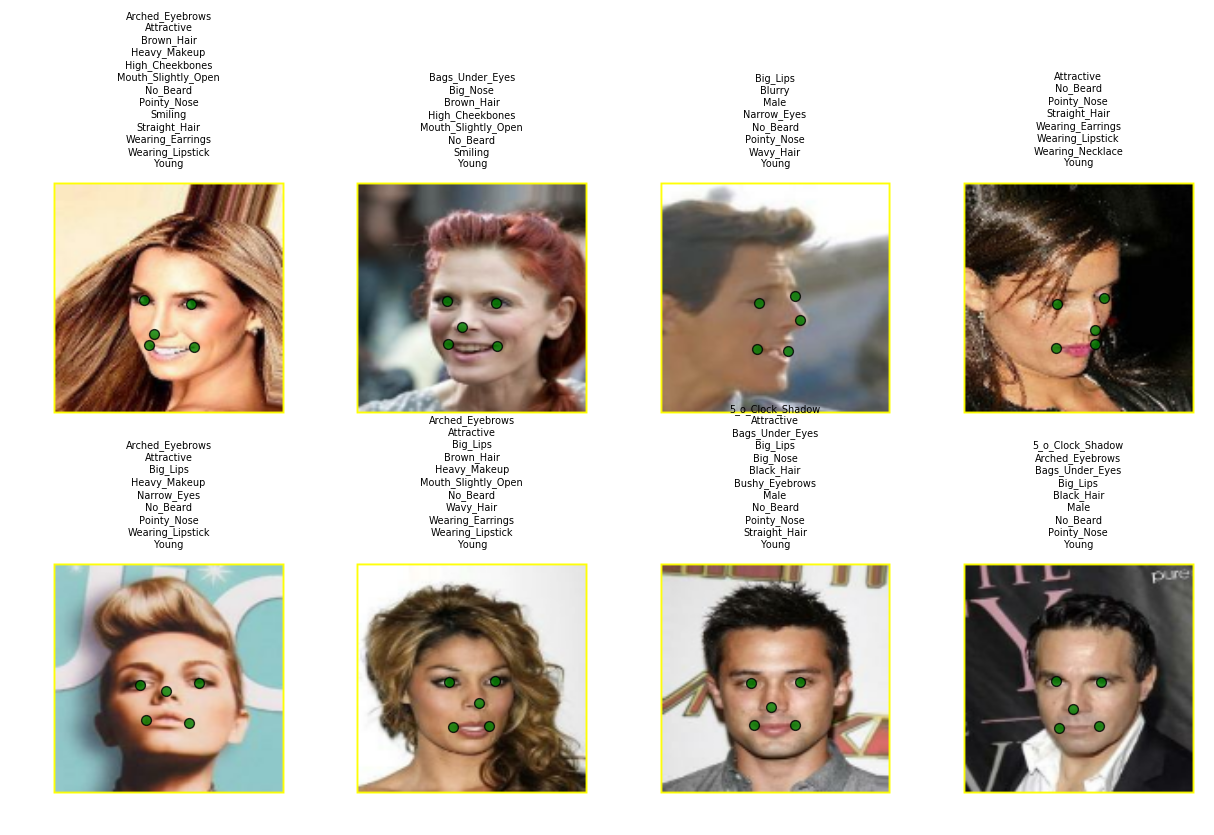

In [28]:
# load training dataset
loader =  celeba.CelebaLoader(resize=128,
                              save_image_in_records=save_image_in_records,
                              data_dir=source_path,
                              verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn, shuffle_buffer=1)
    if 'bounding_box' in data:
        data['image'] = tf.image.draw_bounding_boxes(
            data['image'], tf.gather(tf.expand_dims(data['bounding_box'], axis=1), [1, 0, 3, 2], axis=-1))
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(15, 9))
for i, ax in enumerate(axis.flatten()):
    image = data_['image'][i]
    landmarks = data_['landmarks'][i] * image.shape[:2]
    attributes = [celeba.CelebaLoader.attributes_list[x] for x in np.where(data_['attributes'][i])[0]]
    ax.set_title('\n'.join(attributes), fontsize=7)
    ax.imshow(image)
    ax.scatter(landmarks[:, 0], landmarks[:, 1], s=50, c='g', marker='o', alpha=0.8)
    ax.set_axis_off()
plt.show()

## VisdA

---
<a id='visda'></a>

Original Download [[link]](http://ai.bu.edu/visda-2017/)


#### Classification track
`source_path` is a directory containing the three directories `train`, `validation` and `test` as downloaded on the original website

`target_path` is the base path to save TFRecords to

TFRecords will contain:

  * `image`: Either a (?, ?, 3) uint8-array or a string containing the relative filename of the image;  depending of the value of the *save_image_in_records* argument.
  * `class`: scalar in 0-11. Only for train and val data.

In [34]:
source_path = os.path.expanduser('~/Data/VisDA/Classification/')
target_path = 'TFRecords/tf_visda_classification'
save_image_in_records = False   # whether to save image directly in TFrecords or only a path to it

In [5]:
%%time
# convert VisDA dataset to TFRecords
converter = visda.VisdaClassificationConverter(source_path)
converter.convert(target_path, save_image_in_records=save_image_in_records)


Load train
Image 152397/152397
Wrote train in file TFRecords/tf_visda_classification_train

Load val
Image 55388/55388
Wrote val in file TFRecords/tf_visda_classification_val

Load test
Image 72372/72372
Wrote test in file TFRecords/tf_visda_classification_test

CPU times: user 14.9 s, sys: 296 ms, total: 15.2 s
Wall time: 15.2 s


Creating dataset with batch_size 8 and shuffle buffer 100000


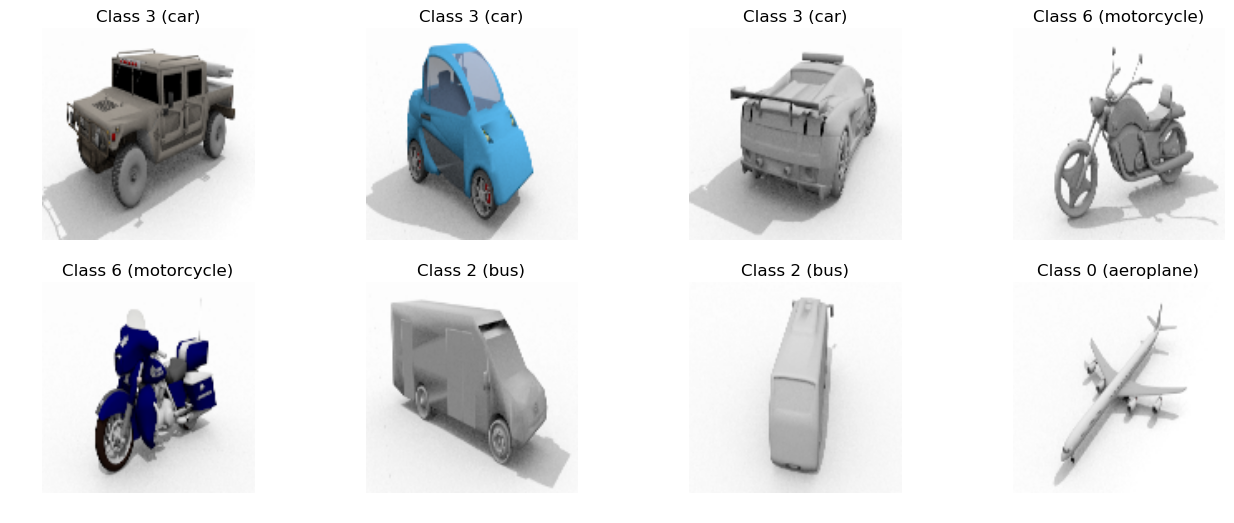

In [35]:
# load training dataset
loader = visda.VisdaClassificationLoader(
    save_image_in_records=save_image_in_records, data_dir=source_path, resize=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn, shuffle_buffer=100000)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(16, 6))
for i, ax in enumerate(axis.flatten()):
    if data_['class'][i] > -1:
        ax.set_title('Class %d (%s)' % (data_['class'][i], loader.classes_names[data_['class'][i]]))
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()

## PACS

---
<a id='pacs'></a>

Original Download [[link]](http://www.eecs.qmul.ac.uk/~dl307/project_iccv2017)

`source_path` corresponds to the directory extracted from the archive downloaded from the original website

`target_path` is the base path to save TFRecords to

TFRecords will contain:

  * `image`: Either a (?, ?, 3) uint8-array or a string containing the relative filename of the image;  depending of the value of the *save_image_in_records* argument.
  * `class_content`: scalar in 0-6 containing the category of the depicted object.
  * `class_style`: scalar in 0-3 containing the style of the image. Alternatively, the option `separate_styles` allows to generate an independant TFRecords for each of the style.

In [69]:
source_path = os.path.expanduser('~/Data/PACS/')
target_path = 'TFRecords/tf_pacs'
split_path = 'TFRecords/pacs_data_splits.txt'  # path to save the optional data split
save_image_in_records = False                  # whether to save image directly in TFrecords or only a path to it
separate_styles = False                        # whether to generate a TFRecords for each style independently

In [100]:
%%time
# convert PACS dataset to TFRecords
converter = pacs.PACSConverter(source_path)
converter.generate_split(split_path, train=0.7, val=0.1, test=0.2)  # (opt) generate a random train/val/test split
converter.convert(target_path, save_image_in_records=save_image_in_records, separate_styles=separate_styles)

Splits saved in TFRecords/pacs_data_splits.txt

Load train
style 4/4 - content 7/7
Wrote train in file TFRecords/tf_pacs_train

Load val
style 4/4 - content 7/7
Wrote val in file TFRecords/tf_pacs_val

Load test
style 4/4 - content 7/7
Wrote test in file TFRecords/tf_pacs_test

CPU times: user 190 ms, sys: 313 µs, total: 190 ms
Wall time: 190 ms


Creating dataset with batch_size 8 and shuffle buffer 10000


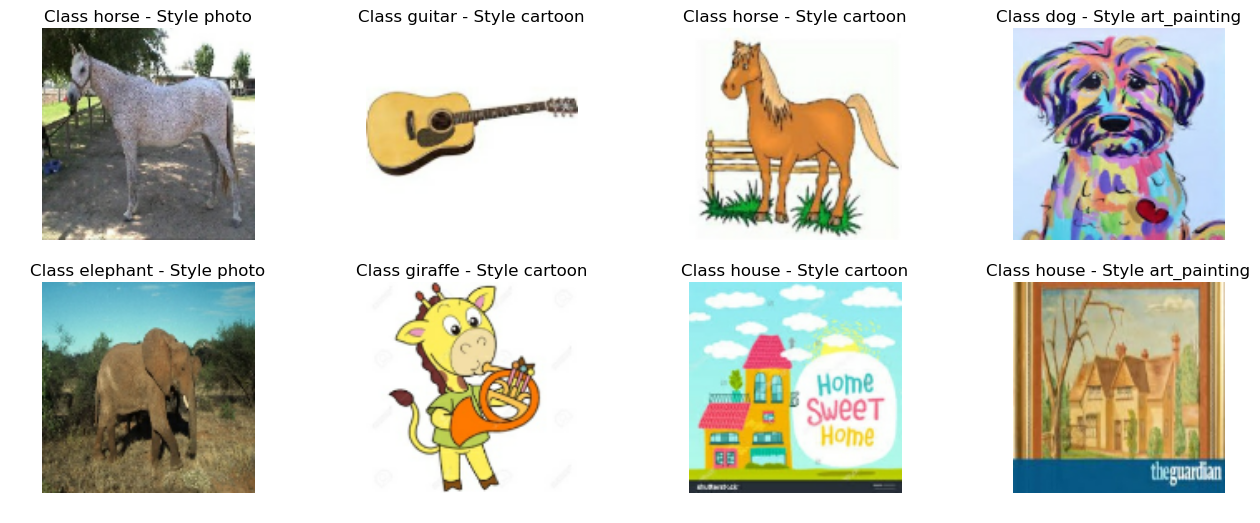

In [107]:
# load training dataset
loader = pacs.PACSLoader(
    save_image_in_records=save_image_in_records, data_dir=source_path, resize=128, verbose=True)
with tf.Graph().as_default():
    data = get_tf_dataset('%s_train' % target_path, loader.parsing_fn, shuffle_buffer=10000)
    with tf.Session() as sess:
        data_ = sess.run(data)
# Display
_, axis = plt.subplots(2, 4, figsize=(16, 6))
for i, ax in enumerate(axis.flatten()):
    ax.set_title('Class %s - Style %s' % (loader.content_names[data_['class_content'][i]],
                                          loader.style_names[data_['class_style'][i]]))
    ax.imshow(data_['image'][i])
    ax.set_axis_off()
plt.show()